# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [1]:
using Clustering, CSV, DataFrames, Gadfly

## 讀取資料

In [2]:
data = CSV.read("s1-set.csv")

5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

In [3]:
X = Matrix(data[:, 1:2])'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [4]:
k = 15
result = kmeans(X, k)

KmeansResult{Array{Float64,2},Float64,Int64}([802634.0276923077 448799.92553191487 … 229600.98086124402 507818.3133903134; 324907.5969230769 811006.2978723404 … 858932.4593301435 175610.41595441595], [10, 10, 10, 10, 10, 10, 10, 10, 10, 10  …  5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [3.868603093541992e9, 3.784863740838379e9, 8.956930531298828e7, 6.740235058618164e8, 1.976029744717041e9, 6.258253758146973e8, 1.402054662494873e9, 3.6132858852539062e6, 4.345366158831543e9, 3.3965333364257812e6  …  2.818333299736328e8, 5.894317032715332e9, 2.948263640739258e9, 2.094690922705078e7, 5.5591316869765625e9, 1.75454214078125e8, 2.2580043328320312e8, 7.600214612407227e8, 6.145172446421875e9, 2.748227945390625e8], [325, 94, 340, 350, 375, 669, 132, 220, 335, 297, 327, 340, 636, 209, 351], [325, 94, 340, 350, 375, 669, 132, 220, 335, 297, 327, 340, 636, 209, 351], 1.89268712018889e13, 26, true)

In [5]:
data[!, :cluster] = string.(assignments(result));

In [6]:
data

5000×3 DataFrame
│ Row  │ x      │ y      │ cluster │
│      │ Int64  │ Int64  │ String  │
├──────┼────────┼────────┼─────────┤
│ 1    │ 664159 │ 550946 │ 10      │
│ 2    │ 665845 │ 557965 │ 10      │
│ 3    │ 597173 │ 575538 │ 10      │
│ 4    │ 618600 │ 551446 │ 10      │
│ 5    │ 635690 │ 608046 │ 10      │
│ 6    │ 588100 │ 557588 │ 10      │
│ 7    │ 582015 │ 546191 │ 10      │
│ 8    │ 604678 │ 574577 │ 10      │
│ 9    │ 572029 │ 518313 │ 10      │
│ 10   │ 604737 │ 574591 │ 10      │
⋮
│ 4990 │ 681053 │ 892766 │ 5       │
│ 4991 │ 683321 │ 873932 │ 5       │
│ 4992 │ 701017 │ 931252 │ 5       │
│ 4993 │ 645677 │ 814395 │ 5       │
│ 4994 │ 677362 │ 853471 │ 5       │
│ 4995 │ 659046 │ 930099 │ 5       │
│ 4996 │ 665426 │ 853940 │ 5       │
│ 4997 │ 691827 │ 863963 │ 5       │
│ 4998 │ 650661 │ 861267 │ 5       │
│ 4999 │ 599647 │ 858702 │ 5       │
│ 5000 │ 684091 │ 842566 │ 5       │

In [7]:
result.centers

2×15 Array{Float64,2}:
 802634.0        4.488e5    3.20603e5  …  8.4403e5  229601.0        5.07818e5
      3.24908e5  8.11006e5  1.61522e5     6.3161e5       8.58932e5  1.7561e5 

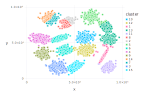

In [8]:
plot(data, x="x", y="y", color="cluster", Geom.point)